In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

%matplotlib inline

In [2]:
dataset = pd.read_csv("./Homework_Datasets/Pizza.csv")

In [3]:
dataset.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   brand   300 non-null    object 
 1   id      300 non-null    int64  
 2   mois    300 non-null    float64
 3   prot    300 non-null    float64
 4   fat     300 non-null    float64
 5   ash     300 non-null    float64
 6   sodium  300 non-null    float64
 7   carb    300 non-null    float64
 8   cal     300 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.2+ KB


In [5]:
target_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'J']

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels
dataset['brand'] = label_encoder.fit_transform(dataset['brand'])


In [6]:
dataset.describe()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.560000,20841.040000,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,2.889214,6962.917222,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,0.000000,14003.000000,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,2.000000,14093.750000,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,5.000000,24020.500000,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,7.000000,24110.250000,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,9.000000,34045.000000,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


<Axes: xlabel='brand', ylabel='cal'>

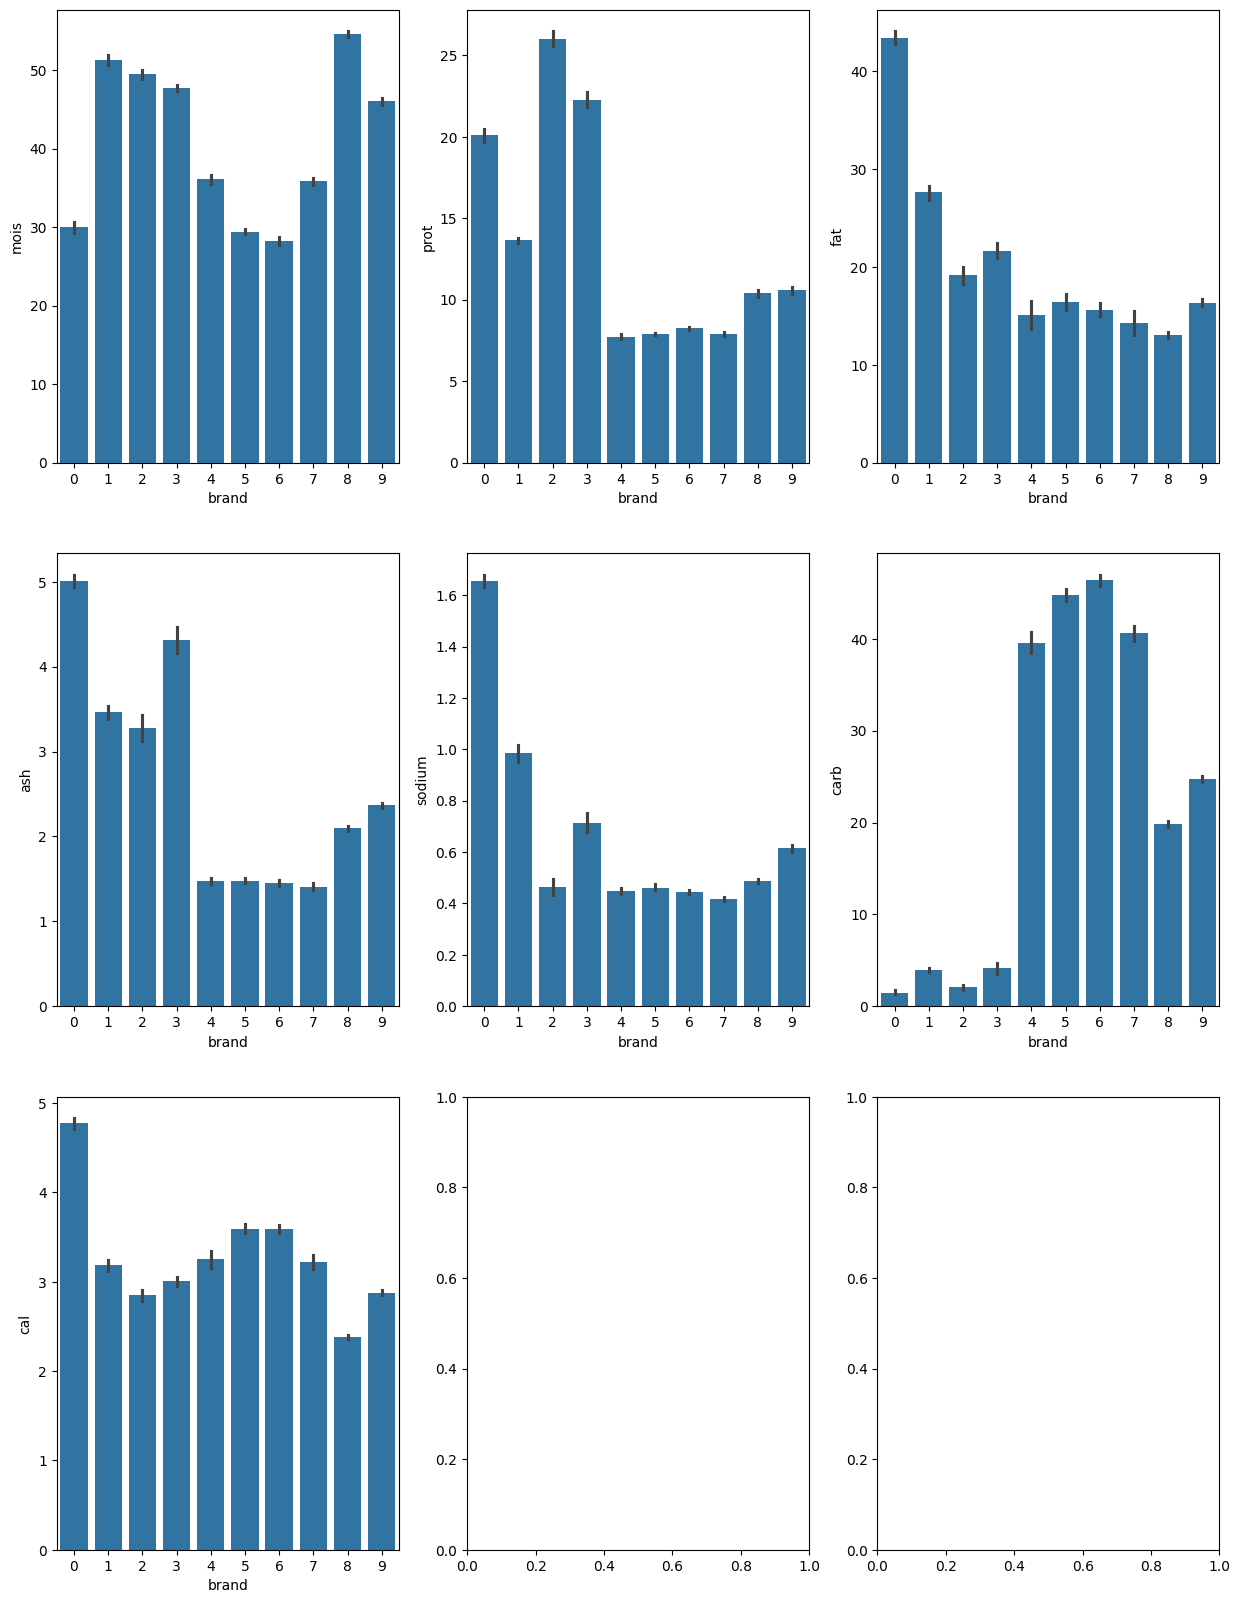

In [7]:
fig, ax = plt.subplots(3,3 , figsize = (15,20)) # Making Subplots

sns.barplot(data = dataset, y ="mois", x="brand", ax=ax[0,0])
sns.barplot(data = dataset, y ="prot", x="brand", ax=ax[0,1])
sns.barplot(data = dataset, y ="fat", x="brand", ax=ax[0,2])
sns.barplot(data = dataset, y ="ash", x="brand", ax=ax[1,0])
sns.barplot(data = dataset, y ="sodium", x="brand", ax=ax[1,1])
sns.barplot(data = dataset, y ="carb", x="brand", ax=ax[1,2])
sns.barplot(data = dataset, y ="cal", x="brand", ax=ax[2,0])

In [8]:
# Splitting datset to X and y axis 

X=dataset.iloc[: , 2:8].values
y=dataset.iloc[: ,0].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [10]:
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [12]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

In [13]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  2  0  0]
 [ 0  0  0  0  0  4  2  0  0  0]
 [ 0  0  0  0  1  1  3  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  6]]


0.7166666666666667

In [14]:
classifier = SVC(kernel='linear', random_state = 42)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=1)

In [15]:
y_pred=classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
final_classifier = classifier    # since max quality is for SVM so we have stored this in a final variable

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  2  0  0]
 [ 0  0  0  0  0  5  1  0  0  0]
 [ 0  0  0  0  0  0  4  1  0  0]
 [ 0  0  0  0 10  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  6]]


0.7666666666666667

In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for different SVC models
svm_linear = {'C': [0.1, 1, 10, 100 ], 'kernel': ['linear']}
svm_others = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 'auto'],
              'kernel': ['poly', 'rbf', 'sigmoid']}

# Combine the parameter grids
parameters = [svm_linear, svm_others]

# Create an SVC model
svc_model = SVC()

# Perform grid search
grid_search = GridSearchCV(svc_model, param_grid=parameters, cv=5, verbose=2)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, 

In [19]:
# Retraining an SVC model with the best parameters
best_svc = SVC(C=10, kernel='linear')
best_svc.fit(X_train, y_train)

# Make predictions on the test data
svc_pred = best_svc.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

accuracy_score(y_test, svc_pred)

[[7 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 4 1 0 0]
 [0 0 0 0 6 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7
           4       0.45      1.00      0.62         5
           5       1.00      1.00      1.00         6
           6       1.00      0.80      0.89         5
           7       0.83      0.45      0.59        11
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         6

    accuracy                           0.88        60
   macro avg       0.93      0.93      0.91        60
weighted avg       0.92      0.88      0.88        60



0.8833333333333333